In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [ ]:
(train_x, train_y),(test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
class_names = ['Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

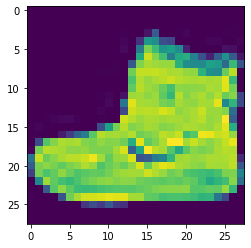

In [ ]:
plt.figure()
plt.imshow(train_x[0])

In [ ]:
num_classes =  10
image_height = 28
image_width = 28
n_channels = 1

In [ ]:
train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

In [ ]:
trainData = np.pad(trainData, ((0,0),(2,2),(2,2),(0,0)), 'constant')
testData = np.pad(testData, ((0,0),(2,2),(2,2),(0,0)), 'constant')

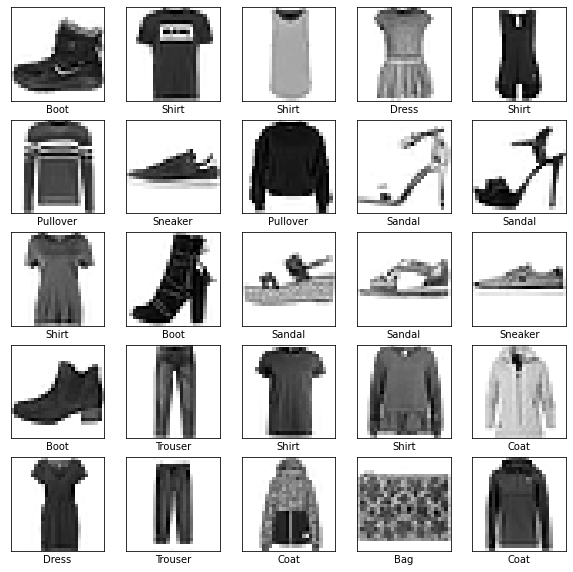

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5 , 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_x[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_y[i]])

In [ ]:
train_x = train_x.reshape(train_x.shape[0], image_height, image_width, n_channels)
test_x = test_x.reshape(test_x.shape[0], image_height, image_width, n_channels)

In [ ]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

model = Sequential([
      Conv2D(6, 5, padding = 'valid', activation = tf.nn.tanh, input_shape = (image_height, image_width,n_channels)),
      AveragePooling2D(pool_size = (2,2), strides = (2, 2)),
     
      Conv2D(16, 5, padding = 'valid', activation = tf.nn.tanh),
      AveragePooling2D(pool_size = (2,2), strides = (2, 2)),

      Flatten(),
      Dense(120, activation = tf.nn.tanh),
      Dense(84, activation = tf.nn.tanh),
      Dense(num_classes, activation = tf.nn.softmax)    
    ])

In [ ]:
model.compile(tf.keras.optimizers.SGD(learning_rate=0.01),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               30840     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = None):
    if(logs.get('accuracy') > 0.99):
      print('Reached 99% accuracy so cancelling training')
      self.model.stop_training=True

In [ ]:
  batch_size = 128
  epochs = 150
  history = model.fit(x = train_x, y = train_y, validation_data = (test_x, test_y),
                      batch_size=batch_size, epochs = epochs, verbose=1, callbacks = [myCallBack()])

Epoch 1/150
469/469 [==============================] - 21s 45ms/step - loss: 2.2758 - accuracy: 0.1614 - val_loss: 2.2393 - val_accuracy: 0.1951
Epoch 2/150
469/469 [==============================] - 22s 46ms/step - loss: 2.1819 - accuracy: 0.3438 - val_loss: 2.1182 - val_accuracy: 0.4367
Epoch 3/150
469/469 [==============================] - 21s 45ms/step - loss: 2.0464 - accuracy: 0.4813 - val_loss: 1.9915 - val_accuracy: 0.5314
Epoch 4/150
469/469 [==============================] - 21s 45ms/step - loss: 1.9593 - accuracy: 0.5609 - val_loss: 1.9367 - val_accuracy: 0.5666
Epoch 5/150
469/469 [==============================] - 21s 46ms/step - loss: 1.9127 - accuracy: 0.5966 - val_loss: 1.8888 - val_accuracy: 0.6318
Epoch 6/150
469/469 [==============================] - 21s 45ms/step - loss: 1.8662 - accuracy: 0.6450 - val_loss: 1.8502 - val_accuracy: 0.6506
Epoch 7/150
469/469 [==============================] - 21s 45ms/step - loss: 1.8331 - accuracy: 0.6620 - val_loss: 1.8218 - val_ac

Text(0.5, 1.0, 'Training and Validation Accuracy')

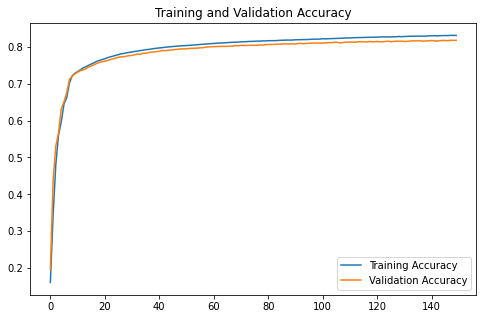

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

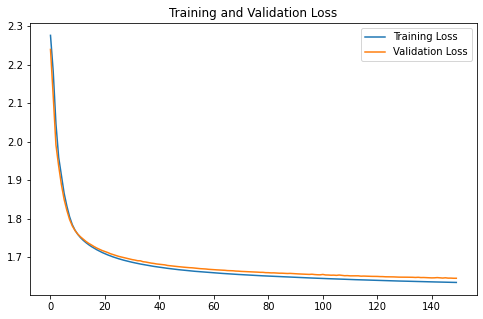

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
(loss, accuracy) = model.evaluate(test_x, test_y,
                                  batch_size = batch_size, verbose = 1)
print('Accuracy is {:.2f}%'.format(accuracy*100))

79/79 [==============================] - 2s 20ms/step - loss: 1.6453 - accuracy: 0.8172
Accuracy is 81.72%


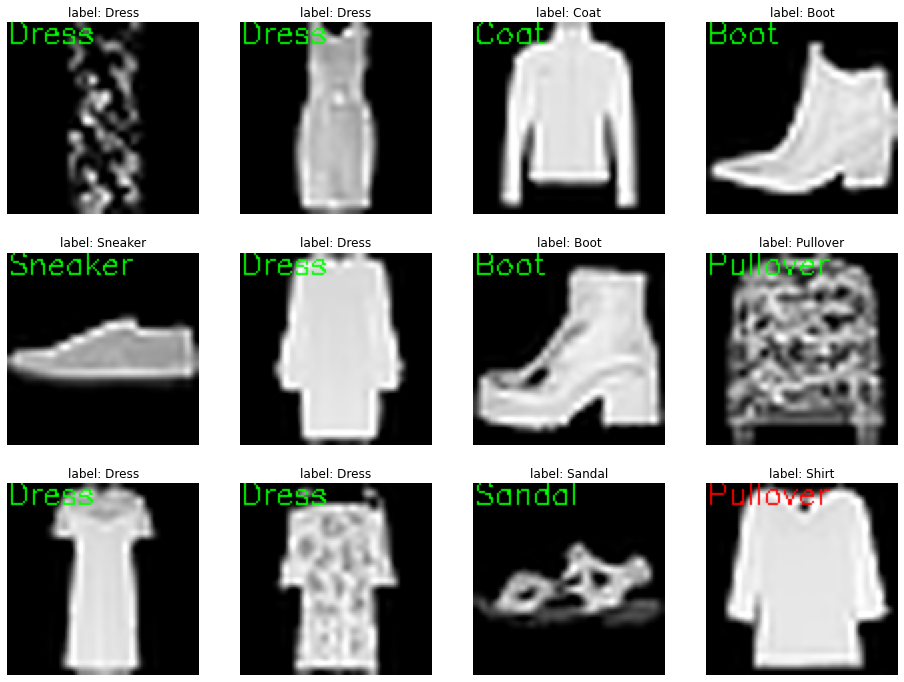

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

# set up matplotlib fig, and size it to fit 3x4 pics
nrows = 3
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

# randomly select a few testing digits
num_predictions = 12
test_indices = np.random.choice(np.arange(0, len(test_y)), size=(num_predictions,))
test_images = np.stack(([test_x[i] for i in test_indices]))
test_labels = np.stack(([test_y[i] for i in test_indices]))

# compute predictions
predictions = model.predict(test_images)

for i in range(num_predictions):
    # select the most probable class
    prediction = np.argmax(predictions[i])

    # rescale the test image
    image = (test_images[i] * 255).astype("uint8")

    # resize the image from a 28 x 28 image to a 96 x 96 image so we can better see it
    image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_CUBIC)

    # convert grayscale image to RGB color
    image = cv2.merge([image] * 3)

    # select prediction text color
    if prediction == test_labels[i]:
        rgb_color = (0, 255, 0) # green for correct predictions
    else:
        rgb_color = (255, 0, 0) # red for wrong predictions

    # show the image and prediction
    cv2.putText(image, str(class_names[prediction]), (0, 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, rgb_color, 1)
    
    # set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1, title="label: %s" % class_names[test_labels[i]])
    sp.axis('Off') # don't show axes (or gridlines)
    plt.imshow(image)

# show figure matrix
plt.show()